<a href="https://colab.research.google.com/github/stellagerantoni/learning-time-series-counterfactuals/blob/main/traffic_lights_CnnWi%CF%84hPytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
from PIL import Image
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, balanced_accuracy_score, log_loss

In [ ]:
!unzip "/content/drive/MyDrive/GTSRB-Training_fixed" -d "/content/"

In [ ]:
#import zipfile
#import csv

train_images = []
train_labels = []
validation_images = []
validation_labels = []
test_images = []
test_labels = []
annotations=[]

In [ ]:
# Importing the training data, its labels and the x,y values to cut the images and keep only the object we want the model to detect

root_folder = '/content/GTSRB/Training/'
dir_list_classes = sorted(os.listdir(root_folder))
for path in dir_list_classes[0:43]:
  dir_list_images = sorted(os.listdir(os.path.join(root_folder,path)))
  annotation = pd.read_csv(os.path.join(root_folder,path,dir_list_images[-1]),delimiter = ';')
  img_nb = 0
  for file in dir_list_images[:150]:
    img_path = os.path.join(root_folder,path)
    img = cv2.imread(os.path.join(img_path, file))

    x1 = annotation.loc[img_nb,'Roi.X1']
    y1 = annotation.loc[img_nb,'Roi.Y1']
    x2 = annotation.loc[img_nb,'Roi.X2']
    y2 = annotation.loc[img_nb,'Roi.Y2']

    cropped_img = img[y1:y2, x1:x2]

    resized_img = cv2.resize(cropped_img, (100, 100))
    train_images.append(resized_img)

    class_id = annotation.loc[img_nb,'ClassId']
    train_labels.append(class_id)
    img_nb +=1

In [ ]:
# Importing the testing data, its labels and the x,y values to cut the images and keep only the object we want the model to detect

root_folder_test = '/content/drive/MyDrive/Classroom/Final_Test/Images'
root_folder_test_dir = sorted(os.listdir(root_folder_test))
annotation_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/GT-final_test.csv',delimiter = ';')
img_idx = 0
for path in root_folder_test_dir[0:12629]:
    img_path = os.path.join(root_folder_test,path)
    img = cv2.imread(img_path)

    x1 = annotation_test.loc[img_idx,'Roi.X1']
    y1 = annotation_test.loc[img_idx,'Roi.Y1']
    x2 = annotation_test.loc[img_idx,'Roi.X2']
    y2 = annotation_test.loc[img_idx,'Roi.Y2']

    cropped_img = img[y1:y2, x1:x2]
    resized_img = cv2.resize(cropped_img, (100, 100))

    class_id_test = annotation_test.loc[img_idx,'ClassId']
    test_labels.append(class_id_test)

    test_images.append(resized_img)
    img_idx +=1

In [ ]:
#shuffling the training data (testing data is already in no purticular order), and spliting the training data so that 20% becomes validation data.

from sklearn.utils import shuffle
train_images, train_labels = shuffle(train_images, train_labels, random_state=RANDOM_STATE)

from sklearn.model_selection import train_test_split
train_images, validation_images, train_labels, validation_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42, stratify=train_labels)

In [ ]:
#converting everything to a numpy array and normalizing the images so that all the values of the pixels are from 0 to 1.

train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)
validation_images = np.array(validation_images)
validation_labels = np.array(validation_labels)

train_images = train_images/255.0
test_images = test_images/255.0
validation_images = validation_images/255.0

In [ ]:
#transforming the labels so that they are in a one hot encoding form for the model.
from keras.utils import to_categorical

train_labels_categorical = to_categorical(train_labels, num_classes = 43)
validation_labels_categorical = to_categorical(validation_labels, num_classes = 43)
test_labels_categorical = to_categorical(test_labels, num_classes = 43)

In [2]:
from torch.nn import Module
from torch.nn import Conv2d
from torch.nn import Linear
from torch.nn import MaxPool2d
from torch.nn import ReLU
from torch.nn import Softmax
from torch import flatten
from torch.nn import Dropout
import torch.nn.functional as F

In [22]:
class CnnPytorch(Module):
  def __init__(self, features, nb_classes):
    super().__init__()
    self.conv1 = Conv2d(in_channels = features, out_channels = 32, kernel_size = (3,3))
    self.relu1 = ReLU()
    self.pool1 = MaxPool2d(2,2)

    self.conv2 = Conv2d(in_channels = 32, out_channels = 64, kernel_size = (3,3))
    self.relu2 = ReLU()
    self.pool2 = MaxPool2d(2,2)

    self.conv3 = Conv2d(in_channels = 64, out_channels = 128, kernel_size = (3,3))
    self.relu3 = ReLU()
    self.pool3 = MaxPool2d(2,2)

    self.conv4 = Conv2d(in_channels = 128, out_channels = 256, kernel_size = (3,3))
    self.relu4 = ReLU()
    self.pool4 = MaxPool2d(2,2)

    self.dence1 = Linear(256*4*4 ,256)
    self.relu5 = ReLU()
    self.dropout = Dropout(0.5)
    self.dence2 = Linear(256, nb_classes)
    self.softmax = Softmax(dim=1)


In [23]:
def forward(self, x):
  x = self.pool1(self.relu1(self.conv1(x)))
  x = self.pool2(self.relu2(self.conv2(x)))
  x = self.pool3(self.relu3(self.conv3(x)))
  x = self.pool4(self.relu4(self.conv4(x)))

  x = self.relu5(self.dence1(x))
  x = self.dropout(x)
  x = self.dence2(x)
  output = self.softmax(x)
  return output

model = CnnPytorch(3, 43)
print(model)

CnnPytorch(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (relu1): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (relu2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (relu3): ReLU()
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (relu4): ReLU()
  (pool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dence1): Linear(in_features=4096, out_features=256, bias=True)
  (relu5): ReLU()
  (dropout): Dropout(p=0.5, inplace=False)
  (dence2): Linear(in_features=256, out_features=43, bias=True)
  (softmax): Softmax(dim=1)
)


In [21]:
import torch
sample = torch.randn(1,3,100,100)

output = model.conv1(sample)
output = model.relu1(output)
output = model.pool1(output)
print(output.shape)

output = model.conv2(output)
output = model.relu2(output)
output = model.pool2(output)
print(output.shape)

output = model.conv3(output)
output = model.relu3(output)
output = model.pool3(output)
print(output.shape)

output = model.conv4(output)
output = model.relu4(output)
output = model.pool4(output)
print(output.shape)


torch.Size([1, 32, 49, 49])
torch.Size([1, 64, 23, 23])
torch.Size([1, 128, 10, 10])
torch.Size([1, 256, 4, 4])


In [24]:
import torch.nn as nn
from torch.optim import Adam
criterion = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=0.001)

In [25]:
train_images = torch.tensor(train_images)
train_labels = torch.tesnsor(train_labels)
validation_images = torch.tensor(validation_images)
validation_labels = torch.tensor(validation_labels)
test_images = torch.tensor(test_images)
test_labels = torch.tesnor(test_labels)

from torch.utils.data import DataLoader, TensorDataset

train_dataset = TensorDataset(train_images, train_labels)
train_loader = DataLoader(train_dataset, batch_size=128)

validation_dataset = TensorDataset(validation_images, validation_labels)
validation_loader = DataLoader(validation_dataset, bach_size = 128)

# Define the EarlyStopping callback
patience = 30

NameError: ignored

In [ ]:
classifier_history = {'loss': [], 'accuracy': [], 'val_loss': [], 'val_accuracy': []}
best_accuracy = 0.0
for epoch in range(0,150):
  model.train()
  optimazer = zero_grad()


Epoch 1/64
41/41 [==============================] - 4s 47ms/step - loss: 0.0017 - accuracy: 0.9992 - val_loss: 0.0277 - val_accuracy: 0.9953
Epoch 2/64
41/41 [==============================] - 2s 42ms/step - loss: 0.0109 - accuracy: 0.9983 - val_loss: 0.0402 - val_accuracy: 0.9922
Epoch 3/64
41/41 [==============================] - 2s 43ms/step - loss: 5.6831e-04 - accuracy: 0.9998 - val_loss: 0.0359 - val_accuracy: 0.9961
Epoch 4/64
41/41 [==============================] - 2s 43ms/step - loss: 0.0052 - accuracy: 0.9990 - val_loss: 0.0093 - val_accuracy: 0.9969
Epoch 5/64
41/41 [==============================] - 2s 43ms/step - loss: 0.0165 - accuracy: 0.9965 - val_loss: 0.0184 - val_accuracy: 0.9961
Epoch 6/64
41/41 [==============================] - 2s 42ms/step - loss: 0.0147 - accuracy: 0.9961 - val_loss: 0.0465 - val_accuracy: 0.9961
Epoch 7/64
41/41 [==============================] - 2s 42ms/step - loss: 0.0061 - accuracy: 0.9983 - val_loss: 0.0519 - val_accuracy: 0.9953
Epoch 8/6

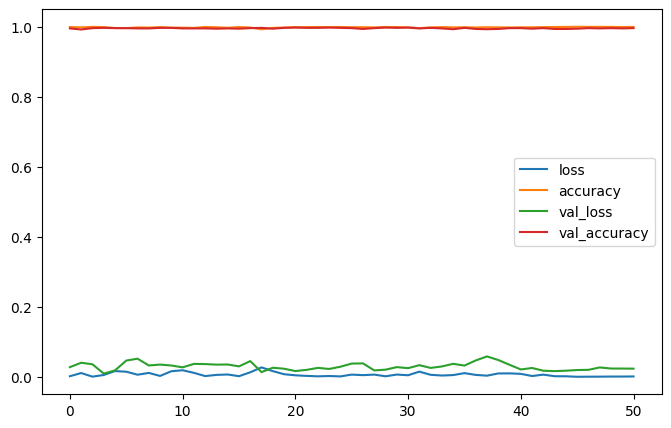

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model_6.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics=['accuracy'])
early_stopping_accuracy = keras.callbacks.EarlyStopping(
    monitor="val_accuracy", patience=30, restore_best_weights=True
)
reset_seeds()
classifier_history_6= model_6.fit(
    train_images,
    train_labels_categorical,
    epochs=64,
    batch_size=128,
    shuffle=True,
    verbose=True,
    validation_data=(validation_images, validation_labels_categorical),
    callbacks=[early_stopping_accuracy],
)
y_pred = model_6.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
acc = balanced_accuracy_score(y_true=test_labels, y_pred=y_pred_classes)
test_loss = log_loss(test_labels,y_pred)
print(f"Classifier trained, with testing accuracy {acc}.")
pd.DataFrame(classifier_history_6.history).plot(figsize=(8,5))
plt.show()